In [1]:
import tifffile as tf
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import PIL
import matplotlib.image as mpimg
import imageio
import skimage
import scipy
from scipy.misc import bytescale
from PIL import Image
from skimage import *

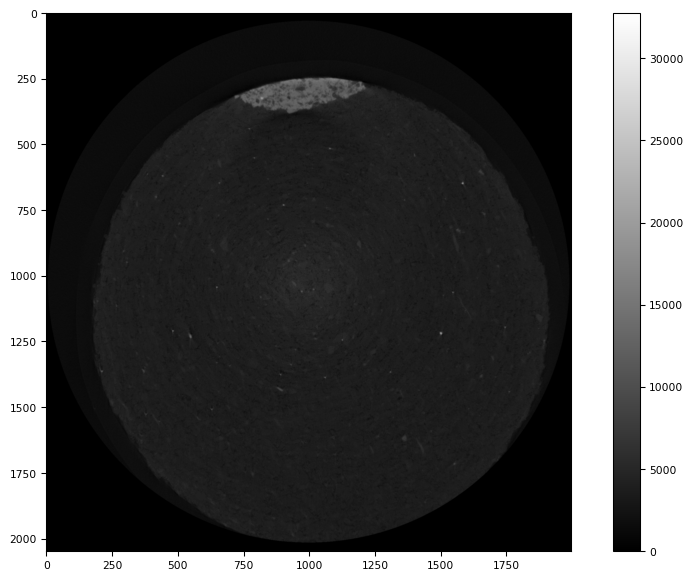

In [2]:
image_path = "0001.tiff"

img = tf.imread(image_path)
imarray = np.array(img)
imgplot = tf.imshow(img, cmap='gray')
plt.show()

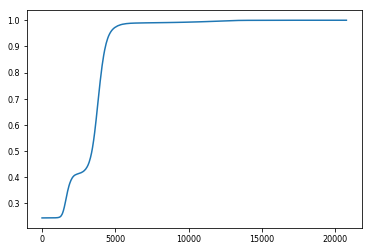

In [3]:
num_bins = np.amax(imarray) - np.amin(imarray) + 1
counts, bin_edges = np.histogram (imarray, bins=num_bins)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

mincdf = np.amin(cdf)
MN = np.prod(imarray.shape)

B = 65535 / (MN - mincdf)

hv = np.round((cdf - mincdf)*B , 0)

In [4]:
rows = imarray.shape[0]
col = imarray.shape[1]

im_eq = np.zeros([rows,col],dtype=int)


for i in range(rows):
    for j in range(col):
        im_eq[i,j] = hv[imarray[i,j]]

In [5]:
nim_eq = im_eq.astype('uint16')

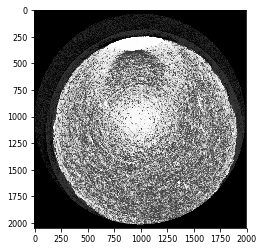

In [6]:
boosted_image = Image.fromarray(nim_eq)
imgplot = plt.imshow(im_eq, cmap='gray')
plt.savefig('Boosted.tiff')
plt.show()

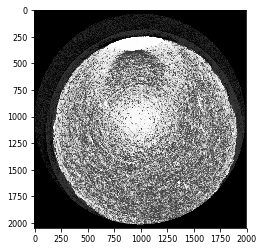

In [7]:
im_eq2 = exposure.equalize_hist(imarray)  #equalization on rgb colorspace? Probably not accurate, since it must be done on each channel

boosted_image = Image.fromarray(im_eq2)
imgplot = plt.imshow(im_eq, cmap='gray')
plt.savefig('Boosted2.tiff')
plt.show()